# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [106]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [107]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [108]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

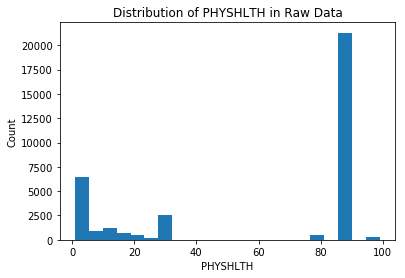

In [109]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [110]:
# Replace None with appropriate text
"""
The data does not seem to be normalized, it needs to be scaled differently because it is over 100. Unless it is meant
as a percentage in which case it would make more sense but it still looks very strange.
"""

'\nThe data does not seem to be normalized, it needs to be scaled differently because it is over 100. Unless it is meant\nas a percentage in which case it would make more sense but it still looks very strange.\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [111]:
# Your code here
df['PHYSHLTH']=df['PHYSHLTH'].apply(lambda x: 0 if x==88 else x)

In [112]:
df=df[df['PHYSHLTH']!=77]
df=df[df['PHYSHLTH']!=99]

Run the code below to ensure you have the correct, cleaned dataframe:

In [113]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [114]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

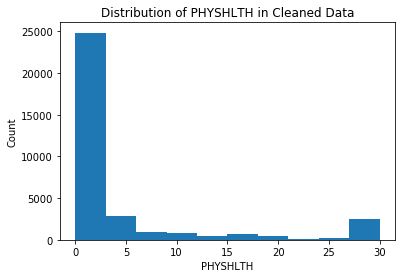

In [115]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [116]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [117]:
# Your code here
df['_STATE']=df['_STATE'].apply(lambda x: "Connecticut" if x==9 else x)
df['_STATE']=df['_STATE'].apply(lambda x: "New Jersey" if x==34 else x)
df['_STATE']=df['_STATE'].apply(lambda x: "New York" if x==36 else x)

Below, we check the values:

In [118]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


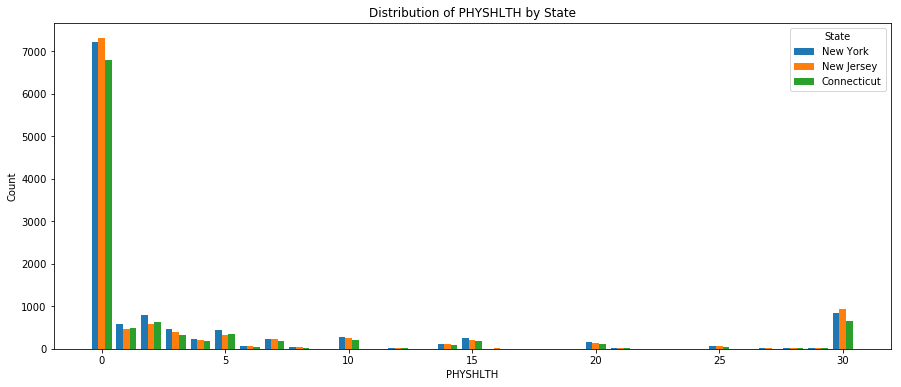

In [119]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [120]:
# Replace None with appropriate text
"""
There doesn't seem to be a significant difference by state, they seem to all follow a similar trend and have 
very similar values throughout. CT seems to always be a little bit lower and NJ always a little bit higher, 
but it seems like a small variance.
"""

"\nThere doesn't seem to be a significant difference by state, they seem to all follow a similar trend and have \nvery similar values throughout. CT seems to always be a little bit lower and NJ always a little bit higher, \nbut it seems like a small variance.\n"

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [121]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [122]:
# Replace None with appropriate text
"""
The most appropriate test is ANOVA, since we are comparing three different samples, and we know that running 3 
3 different t tests to compare the samples 2 by 2 would increase the chance of having false positives.
The variables that we are comparing are numeric, as we are looking at the number of days of bad health.
"""

'\nThe most appropriate test is ANOVA, since we are comparing three different samples, and we know that running 3 \n3 different t tests to compare the samples 2 by 2 would increase the chance of having false positives.\nThe variables that we are comparing are numeric, as we are looking at the number of days of bad health.\n'

Now, identify the null and alternative hypotheses:

In [123]:
# Replace None with appropriate text
"""
The Null Hypothesis is that the is no significal difference between the three states in the numbers of days of bad
health.
The alternative hypothesis instead is that there is a statistically significant difference between the states.
"""

'\nThe Null Hypothesis is that the is no significal difference between the three states in the numbers of days of bad\nhealth.\nThe alternative hypothesis instead is that there is a statistically significant difference between the states.\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [124]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [125]:
# Replace None with appropriate text
"""
The calculated P value is around 8.8^-9, so definitely smaller then the alpha of 0.05.
Since this p is the chance that we would get these results just by random fluctuation, we can reject the null 
hypothesis, and say that there is a statistically significant difference between the states.
We would need to investigate deeper to see where exaclty there is this difference, even if by the means
we can deduce that the most different and higher-health state is Connecticut, and the lower one is NJ.
I would recommend to investigate as to why there is such a difference.
"""

'\nThe calculated P value is around 8.8^-9, so definitely smaller then the alpha of 0.05.\nSince this p is the chance that we would get these results just by random fluctuation, we can reject the null \nhypothesis, and say that there is a statistically significant difference between the states.\nWe would need to investigate deeper to see where exaclty there is this difference, even if by the means\nwe can deduce that the most different and higher-health state is Connecticut, and the lower one is NJ.\nI would recommend to investigate as to why there is such a difference.\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [126]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [127]:
# Your code here
df['RENTHOM1'].replace({1:'Own', 2:'Rent'}, inplace=True)
df=df[df['RENTHOM1']!=3]
df=df[df['RENTHOM1']!=7]
df=df[df['RENTHOM1']!=9]

In [128]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [129]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


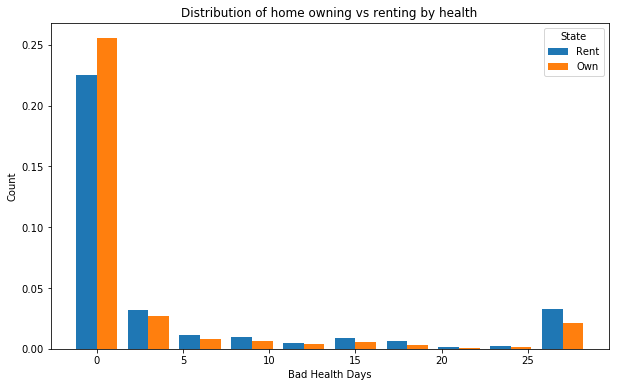

In [130]:
# Your code here
Rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]
Own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(
    x=[Rent, Own],
    label=["Rent", "Own"],
    align="left",
    density=True
)

ax.set_xlabel("Bad Health Days")
ax.set_ylabel("Count")
ax.set_title("Distribution of home owning vs renting by health")
ax.legend(title="State");

Then run this code to find the averages:

In [131]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [132]:
# Replace None with appropriate text
"""
There seems to be a significant difference between the people that rent and the people that own their homes.
The average of bad health days is definitely higher for renters, and we can see that from the graph
since the values are always higher for renters, except on the value zero.
This also makes sense compared to the distribution by state because if we group by state we realize that the 
state with the highest percentage of home owners is CT, which is also the healthiest.
"""

'\nThere seems to be a significant difference between the people that rent and the people that own their homes.\nThe average of bad health days is definitely higher for renters, and we can see that from the graph\nsince the values are always higher for renters, except on the value zero.\nThis also makes sense compared to the distribution by state because if we group by state we realize that the \nstate with the highest percentage of home owners is CT, which is also the healthiest.\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [133]:
"""This time we are comparing only 2 groups, or 2 samples, the ones of the people that own a house and the ones
that rent a house. Therefore in this case a two sample t test  is appropriate. We are going to perform it 
as a two sided since we are exploring differences in either direction, lower or higher health."""

'This time we are comparing only 2 groups, or 2 samples, the ones of the people that own a house and the ones\nthat rent a house. Therefore in this case a two sample t test  is appropriate. We are going to perform it \nas a two sided since we are exploring differences in either direction, lower or higher health.'

In [134]:
"""
Null Hypothesis: There is no significant difference in the health status of people renting vs owning a house
Alternative Hypothesis: There is a significant difference in health between people renting vs owning a house
alpha level of confidence: 0.05
"""

'\nNull Hypothesis: There is no significant difference in the health status of people renting vs owning a house\nAlternative Hypothesis: There is a significant difference in health between people renting vs owning a house\nalpha level of confidence: 0.05\n'

In [135]:
renters=df.loc[df['RENTHOM1']=='Rent']
owners=df.loc[df['RENTHOM1']=='Own']

In [136]:
import scipy.stats as stats

t,p=stats.ttest_ind(renters['PHYSHLTH'],owners['PHYSHLTH'])
print(f'The t value is {t}')
print(f'The p values is {p}')

The t value is 16.435805439672
The p values is 1.878839256394904e-60


In [32]:
"""Once again the p value is very low, definitely smaller than alpha,
which means that we can reject the null hypothesis and conclude
that there is a significant difference in the health status between the people renting and owning houses.
"""

'Once again the p value is very low, definitely smaller than alpha,\nwhich means that we can reject the null hypothesis and conclude\nthat there is a significant difference in the health status between the people renting and owning houses.\n'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [137]:
import numpy as np
df['NICOTINE_USE']= np.nan
df['SMOKER']=df['SMOKE100'].apply(lambda x: 1 if x==1 else 0)
df["EDSMOKER"]=df['USENOW3'].apply(lambda x: 1 if x==1 else 0 )
df["OCCSMOKER"]=df['USENOW3'].apply(lambda x: 1 if x==2 else 0)
df['ECIG']=df['ECIGARET'].apply(lambda x: 1 if x==1 else 0)

In [138]:
df["NICOTINE_USE"]=df["SMOKER"]+df["EDSMOKER"]+df["OCCSMOKER"]+df["ECIG"]

In [139]:
df["NICOTINE_USE"].value_counts()

0    17980
1    10840
2     2997
3      117
Name: NICOTINE_USE, dtype: int64

In [69]:
#UNexpected problem because some people said yes to multiple things:

In [140]:
df['NICOTINE_USE'].replace({2:1, 3:1}, inplace=True)

In [141]:
#Finally
# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [142]:
# Your code here
df.loc[df['PHYSHLTH']<15,'CHRONIC']=0
df.loc[df['PHYSHLTH']>=15,'CHRONIC']=1
# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0.0    28246
1.0     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [160]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0.0,16332,11914
1.0,1648,2040


/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


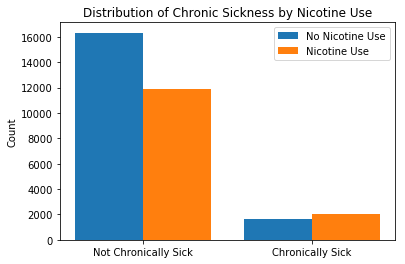

In [144]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [145]:
"""The appropriate statistical test is chi squared since I am comparing two variables, smoking status and chronically
sick, to see if these two variables are independent.
We will set again alpha to 0.05 and state:
Null hypothesis: the variables are independent and there is no connection between being a smoker and being 
chronically ill.
Alternative: There is a correlation between the two variables.
"""

'The appropriate statistical test is chi squared since I am comparing two variables, smoking status and chronically\nsick, to see if these two variables are independent.\nWe will set again alpha to 0.05 and state:\nNull hypothesis: the variables are independent and there is no connection between being a smoker and being \nchronically ill.\nAlternative: There is a correlation between the two variables.\n'

In [161]:
result = stats.chi2_contingency(contingency_table)
chi2, p, dof, exp = result
print(f'p value {p}')

p value 1.4525226945056695e-51


In [163]:
""" There is a correlation between the status of chronic illness and the status of smoker
or non smoker, since p is very small and we can reject the null hypothesis.
It would be interesting to study more in depth with an ANOVA model if there are differences between 
the different groups of different types of smokers."""

' There is a correlation between the status of chronic illness and the status of smoker\nor non smoker, since p is very small and we can reject the null hypothesis.\nIt would be interesting to study more in depth with an ANOVA model if there are differences between \nthe different groups of different types of smokers.'

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [40]:
# Your code here (create additional cells as needed)


In [99]:
""" have already created columns dividing the groups of smokers into different types of smokers
I will study those with an ANOVA test to see if there are differences within those groups in terms of
their health, or if all types of smoking are related in the same way of bad health.
The null hypothesis is that there is no significance difference in physical health among the three different groups of smokers
The alternative hypothesis is that there is a difference between the health of the groups.
Alpha as usual 0.05
"""

' have already created columns dividing the groups of smokers into different types of smokers\nI will study those with an ANOVA test to see if there are differences within those groups in terms of\ntheir health, or if all types of smoking are related in the same way of bad health.\nThe null hypothesis is that there is no significance difference in physical health among the three different groups of smokers\nThe alternative hypothesis is that there is a difference between the health of the groups.\nAlpha as usual 0.05\n'

In [100]:
df["SMOKER"] # regular smokers
df["OCCSMOKER"] #occasional smoker
df["ECIG"] #smoker of e cigarettes

49938     0
49939     0
49940     0
49941     0
49942     0
         ..
303773    0
303774    1
303775    0
303776    0
303778    0
Name: ECIG, Length: 31934, dtype: int64

In [101]:
formula = 'PHYSHLTH ~ C(SMOKER)+C(OCCSMOKER)+C(ECIG)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(SMOKER),1.0,2.251527e+04,22515.266058,315.383152,3.196803e-70
C(OCCSMOKER),1.0,3.336181e+02,333.618075,4.673164,3.064485e-02
C(ECIG),1.0,1.877431e+03,1877.430542,26.298155,2.942750e-07
Residual,31930.0,2.279489e+06,71.390199,NaN,NaN


In [102]:
"""From this analysis we can conclude that for all three groups there is a significance effect in their smoking habits
on their health, and in particular is seems that the regular smokers have significant lower p values
then the other two gropus, meaning for this group the connection to bad health is stronger,
while for e cigarette smokers and occasional smokers it is weaker."""

'From this analysis we can conclude that for all three groups there is a significance effect in their smoking habits\non their health, and in particular is seems that the regular smokers have significant lower p values\nthen the other two gropus, meaning for this group the connection to bad health is stronger,\nwhile for e cigarette smokers and occasional smokers it is weaker.'

In [103]:
"""I am also curious to see what is the difference in health for groups that stopped smoking,
and since the data is available diving the groups based on how long ago they quit, I'm going
to study precisely those groups"""

"I am also curious to see what is the difference in health for groups that stopped smoking,\nand since the data is available diving the groups based on how long ago they quit, I'm going\nto study precisely those groups"

In [104]:
formula = 'PHYSHLTH ~ C(LASTSMK2)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(LASTSMK2),9.0,1644.670903,182.741211,2.309291,0.013721
Residual,9185.0,726836.822300,79.133024,NaN,NaN


In [105]:
"""In this case the correlation is weaker, with our alpha value of 0.05, p is still smaller but closer to alpha
then the previous studied, so we can say that there is a statistical significance but it is not that strong."""

'In this case the correlation is weaker, with our alpha value of 0.05, p is still smaller but closer to alpha\nthen the previous studied, so we can say that there is a statistical significance but it is not that strong.'

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.